In [ ]:
# pip install shap

In [1]:
import shap
import pickle
import pandas as pd

In [2]:
class CONFIG:
    model_path = "Models/baseline_xgboost.pkl"
    dataset = 'Intermediate_data/baseline_v1.csv'
    train_start = '2000-01-01'
    train_end = '2016-12-31'
    test_end = '2023-12-31'

In [3]:
# load model
with open(CONFIG.model_path, 'rb') as file:
    model = pickle.load(file)

In [4]:
# load dataset
df = pd.read_csv(CONFIG.dataset,index_col=0)
X_train = df.loc[CONFIG.train_start:CONFIG.train_end,:].drop('Signal',axis=1)
y_train = df.loc[CONFIG.train_start:CONFIG.train_end,'Signal']
X_test = df.loc[CONFIG.train_end:CONFIG.test_end,:].drop('Signal',axis=1)
y_test = df.loc[CONFIG.train_end:CONFIG.test_end,'Signal']

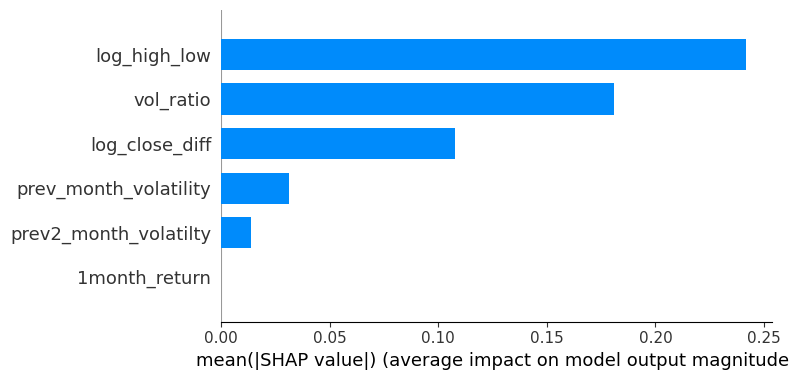

In [9]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)

class_names = ['decrease', 'stays','increase']

shap.summary_plot(shap_values[:,:,0], X_train.values, plot_type="bar", class_names= class_names, feature_names=X_train.columns)